# 09 -Stuff

In [5]:
import warnings

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'arial'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load data

In [6]:
df = pd.read_csv("File Name.csv") 
df.sample(3)

,Unnamed: 0,id,lyrics,source,clean_lyrics,class
1662,1743,3hJLKtTpgct9Y9wKww0BiR,"['[Produced by The Glimmer Twins]', '\n', '\n[...",genius.com,ive been holding out so long ive been sleepin...,1
4610,2386,4FnbmLIXcEUQZ23sfzrk0v,"['[Instrumental]', '\n', '\n(Nobody else, nobo...",genius.com,nobody else nobody else found nobody else nob...,0
3616,8596,623rRTKwGmgjH6sjE9uWLh,"[""I'm the Scatman"", ""\nI'm the Scatman"", '\n',...",songlyrics.com,im the scatman im the scatman everybody stutte...,0


## Most \___ words

In [7]:

# when creating word clouds, maps word fontsize to a color
class colormap_size_func(object):
    def __init__(self, colormap, max_font_size):
        import matplotlib.pyplot as plt
        self.colormap = plt.cm.get_cmap(colormap)
        self.max_font_size = max_font_size

    def __call__(self, word, font_size, position, orientation,
                 random_state=None, **kwargs):
        if random_state is None:
            random_state = Random()
        r, g, b, _ = 255 * np.array(self.colormap(font_size / self.max_font_size))
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(r, g, b)

In [8]:
# for each top artist, calculate his/her average audio feature profile
top_artists = df_nonnull.groupby('artist_clean')['song'].count()
top_artists = top_artists[top_artists >= 5]
audio_features = ['explicit', 'acousticness', 'danceability', 'energy',
                  'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
X_artists = df_nonnull.groupby('artist_clean')[audio_features].mean()
X_artists = X_artists.reindex(top_artists.index)

NameError: name 'df_nonnull' is not defined

NameError: name 'X_artists' is not defined

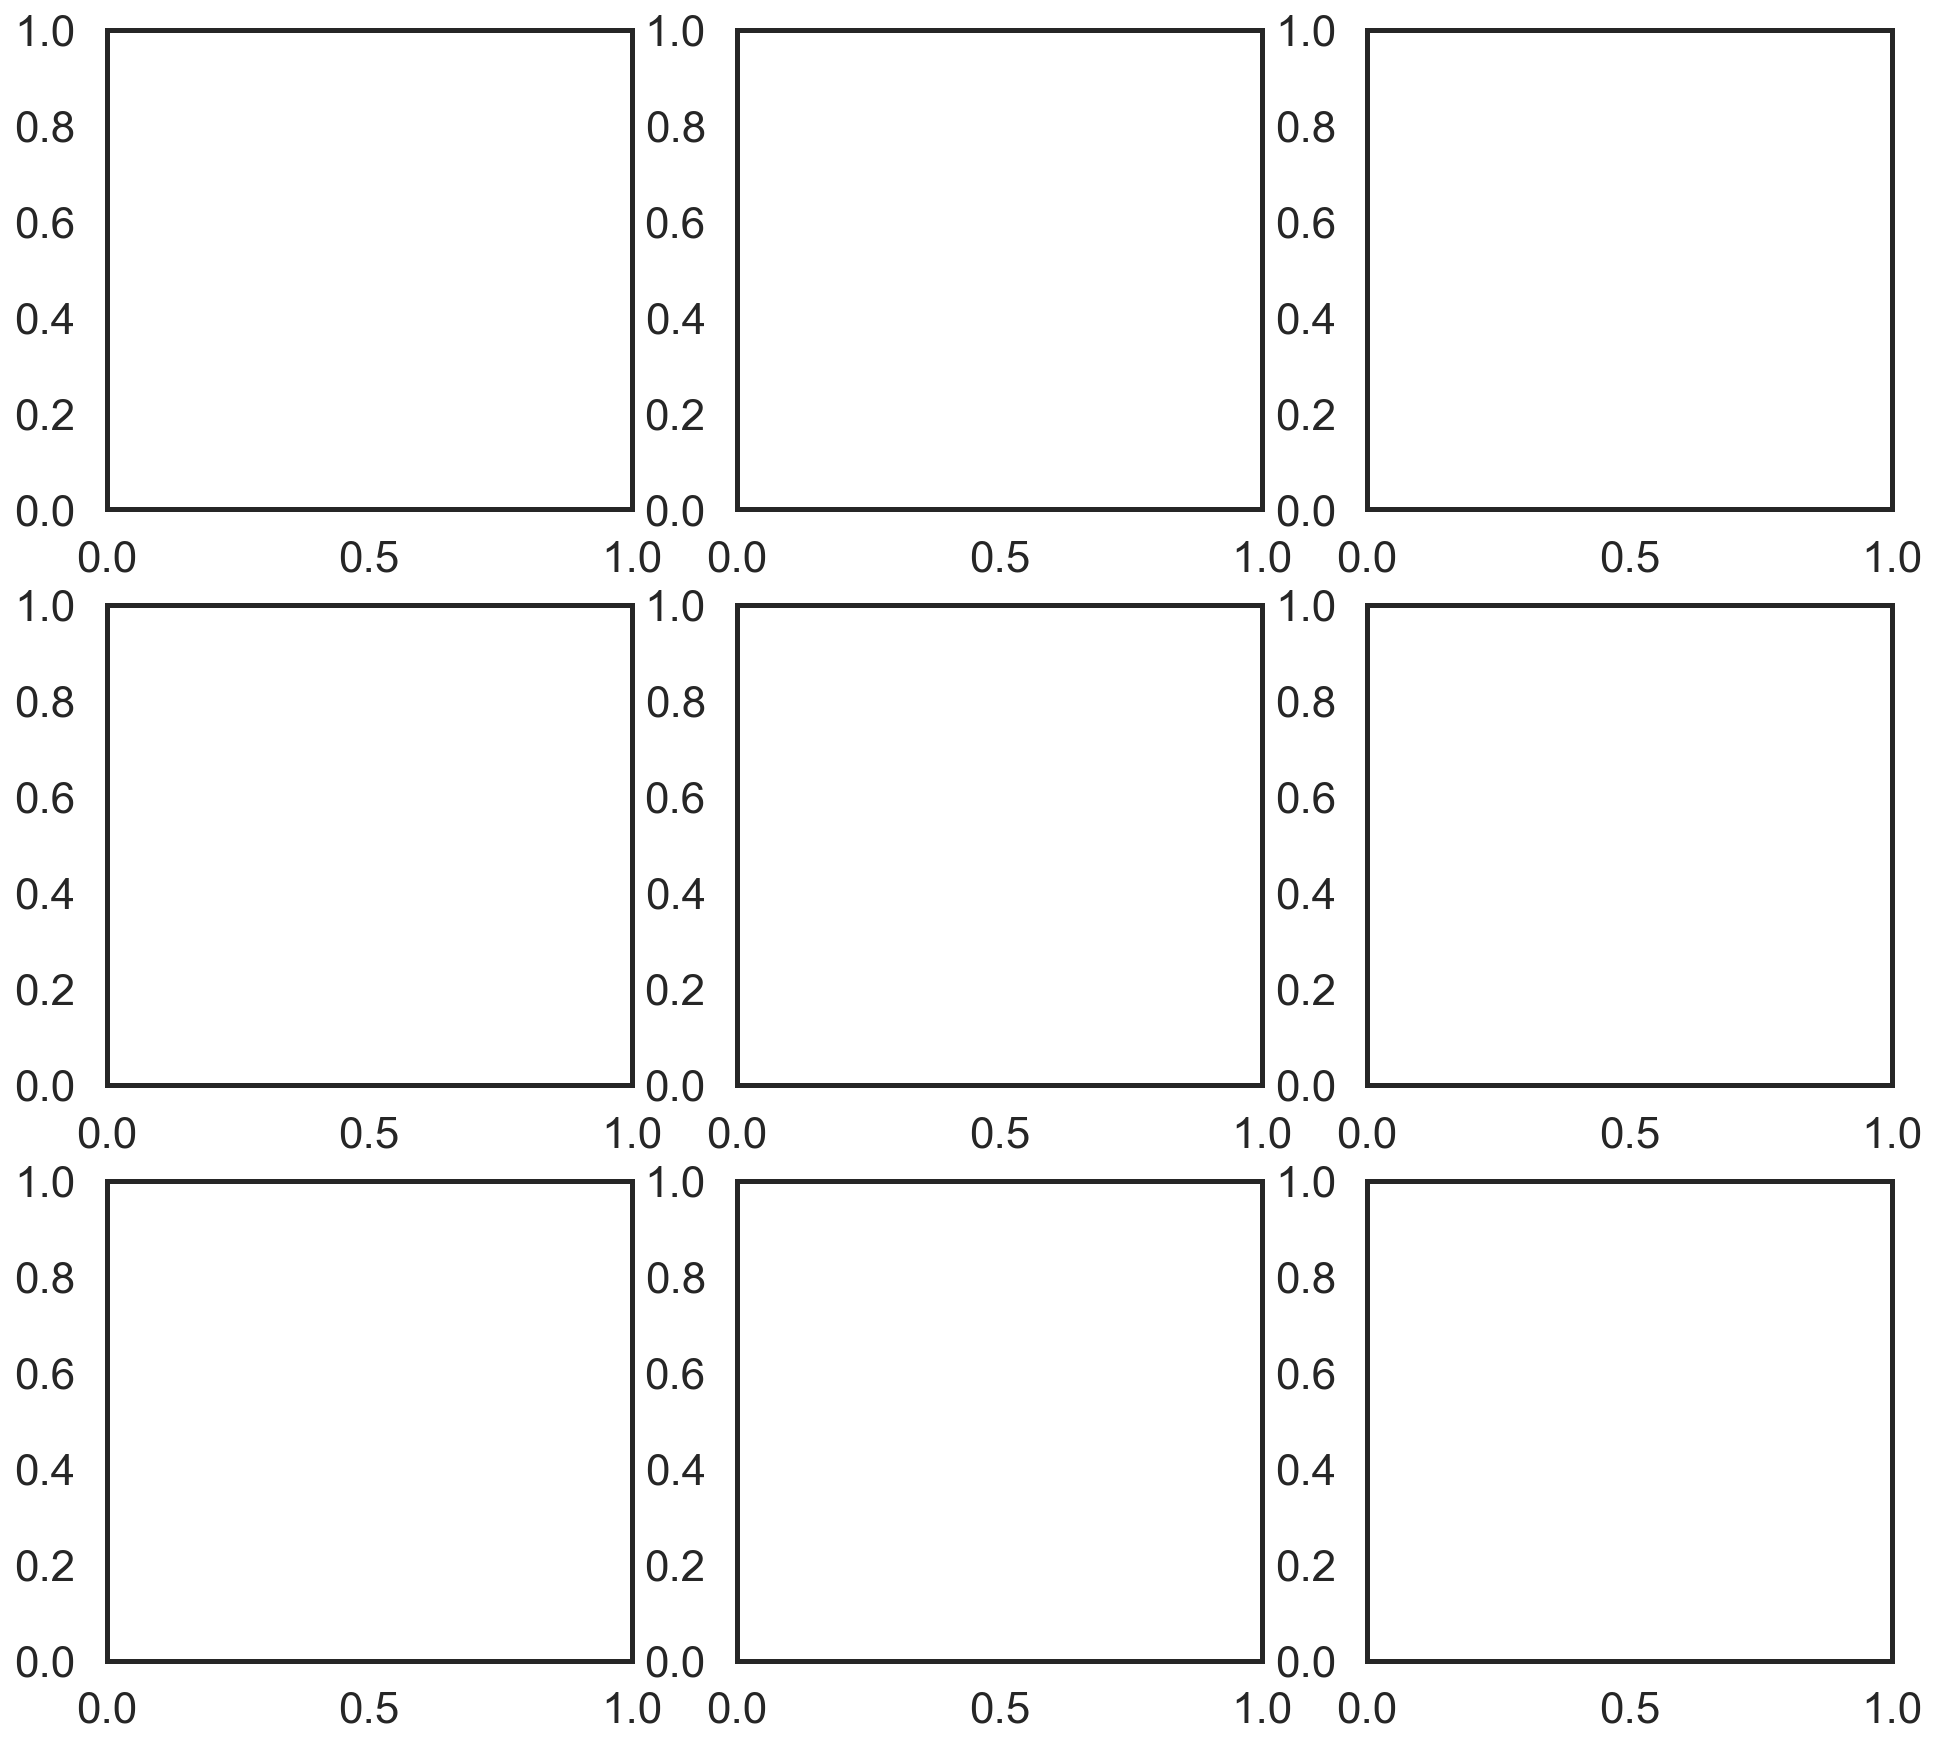

In [9]:
# make subplot axes
fig, axes = plt.subplots(3, 3, figsize=(16,15))
axes = axes.ravel()
adjective = ['explicit', 'acoustic', 'danceable', 'energetic', 'live', 'loud',
             'speechy', 'valent', 'fast']
colormaps = ['Purples', 'OrRd', 'cool', 'spring_r', 'Greens', 'winter_r', 'GnBu',
             'PuRd', 'autumn_r']

for i in range(len(audio_features)):
    # make word-weight dictionary
    color_func = colormap_size_func(colormaps[i], 300)
    feature = X_artists[audio_features[i]] + 1e-3 # no zero values allowed
    dictionary = dict(zip(X_artists.index, feature))
    
    # make word cloud
    wordcloud = WordCloud(background_color='white', height=1200,
                          min_font_size=5, width=1400, color_func=color_func,
                          max_words=len(X_artists), relative_scaling=0.5,
                          max_font_size=300)
    wordcloud = wordcloud.generate_from_frequencies(dictionary)
    
    # display word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set(title='most {} artists'.format(adjective[i]).title())